<a href="https://colab.research.google.com/github/Joao0298/Challenge-Alura-Telecom-X/blob/main/TelecomX_Desafio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Telecom X - Análise de Evasão de Clientes
Este projeto faz parte do desafio 'Churn de Clientes' da Telecom X. O objetivo é realizar um processo completo de ETL e EDA para identificar os fatores que levam ao cancelamento de serviços.

## 📖 Dicionário de Dados
| Variável | Descrição |
| :--- | :--- |
| **customerID** | Número de identificação único de cada cliente |
| **Churn** | Se o cliente deixou ou não a empresa |
| **gender** | Gênero (masculino e feminino) |
| **SeniorCitizen** | Se o cliente tem 65 anos ou mais |
| **Partner** | Se o cliente possui parceiro(a) |
| **Dependents** | Se o cliente possui dependentes |
| **tenure** | Meses de contrato do cliente |
| **PhoneService** | Assinatura de serviço telefônico |
| **MultipleLines** | Assinatura de múltiplas linhas |
| **InternetService** | Provedor de internet |
| **OnlineSecurity** | Segurança online adicional |
| **OnlineBackup** | Backup online adicional |
| **DeviceProtection** | Proteção de dispositivo adicional |
| **TechSupport** | Suporte técnico adicional |
| **StreamingTV** | Assinatura de TV |
| **StreamingMovies** | Assinatura de filmes |
| **Contract** | Tipo de contrato |
| **PaperlessBilling** | Fatura online |
| **PaymentMethod** | Forma de pagamento |
| **Charges.Monthly** | Valor mensal total |
| **Charges.Total** | Valor total gasto |


# 📌 Extração

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extração dos dados
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

def flatten_json(y):
    out = {}
    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out

df = pd.DataFrame([flatten_json(d) for d in data])
print(f'Dados extraídos: {df.shape[0]} linhas e {df.shape[1]} colunas.')


Dados extraídos: 7267 linhas e 21 colunas.


# 🔧 Transformação

In [ ]:
# Verificando inconsistências
print('Valores ausentes:\n', df.isnull().sum())

# Tratando a coluna Charges_Total (conversão para numérico e preenchimento de vazios)
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df['account_Charges_Total'] = df['account_Charges_Total'].fillna(0)

# Removendo duplicatas
df = df.drop_duplicates()

# Criando a coluna 'Contas_Diarias' (Opcional)
df['Contas_Diarias'] = (df['account_Charges_Monthly'] / 30).round(2)

print('Tratamento concluído. Nova coluna Contas_Diarias criada.')


Valores ausentes:
 customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64
Tratamento concluído. Nova coluna Contas_Diarias criada.


# 📊 Carga e Análise

/tmp/ipython-input-208699051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer_tenure', data=df_churn, ax=axes[0], palette='Set2')
/tmp/ipython-input-208699051.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df_churn, ax=axes[1], palette='Set2')
/tmp/ipython-input-208699051.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges_Total', data=df_churn, ax=axes[2], palette='Set2')


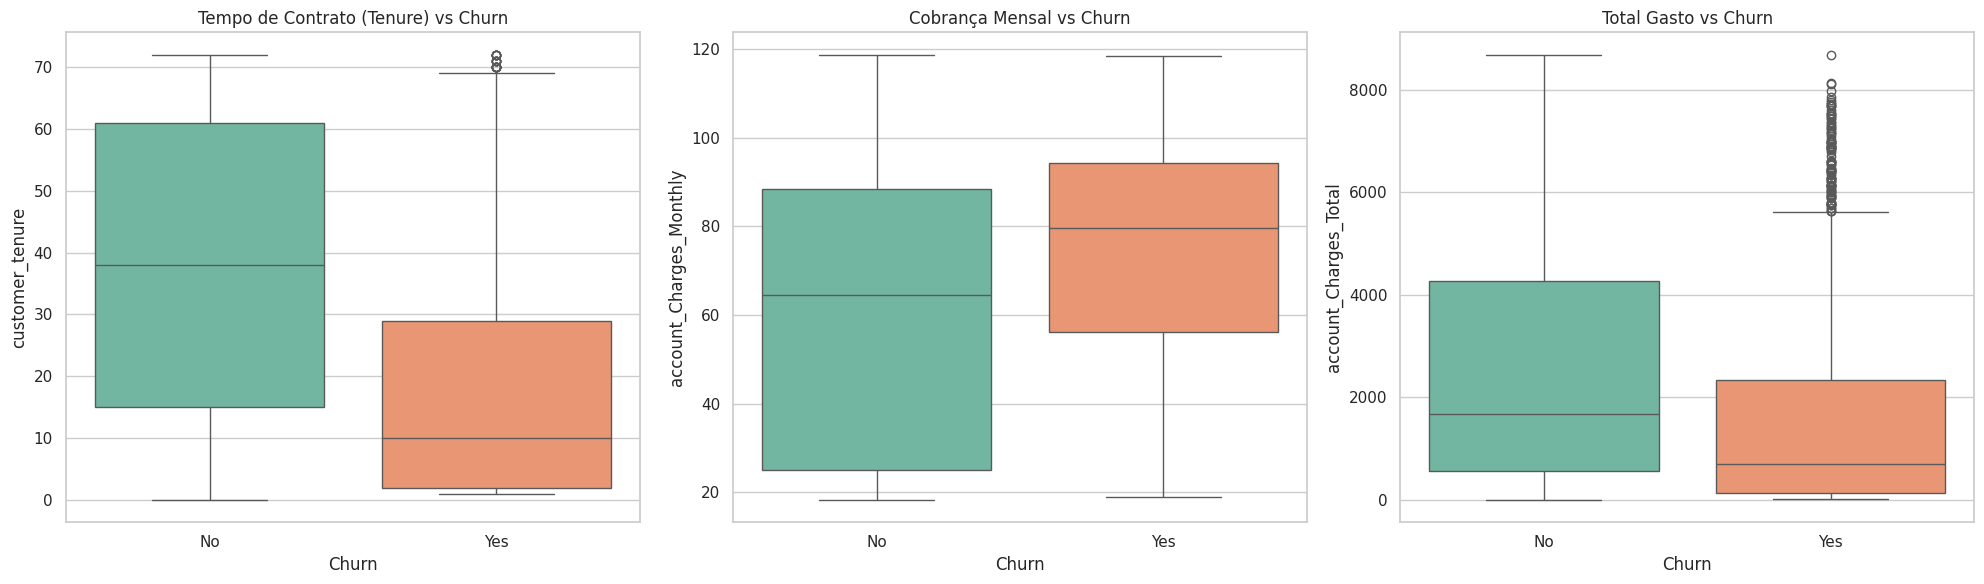

/tmp/ipython-input-208699051.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='account_Contract', y='Churn_Numeric', data=df_churn, palette='viridis')


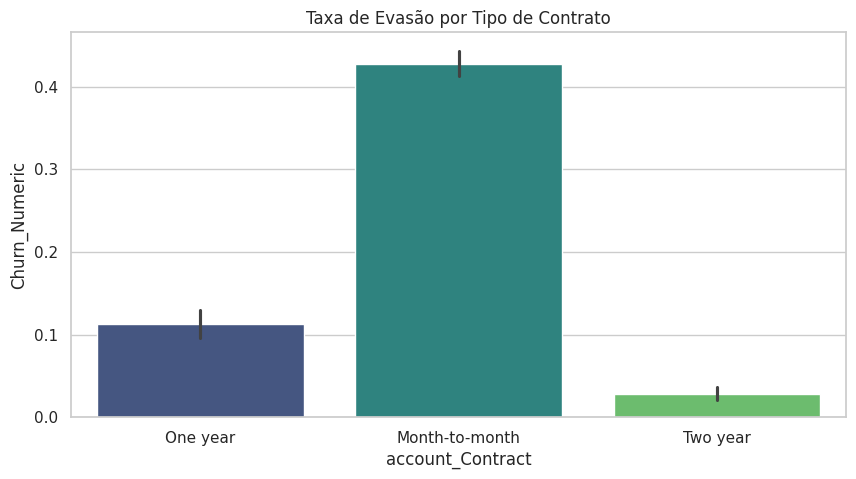

In [ ]:
sns.set_theme(style='whitegrid')
df_churn = df[df['Churn'].isin(['Yes', 'No'])].copy()
df_churn['Churn_Numeric'] = df_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Análise de Variáveis Numéricas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='Churn', y='customer_tenure', data=df_churn, ax=axes[0], palette='Set2')
axes[0].set_title('Tempo de Contrato (Tenure) vs Churn')

sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df_churn, ax=axes[1], palette='Set2')
axes[1].set_title('Cobrança Mensal vs Churn')

sns.boxplot(x='Churn', y='account_Charges_Total', data=df_churn, ax=axes[2], palette='Set2')
axes[2].set_title('Total Gasto vs Churn')

plt.tight_layout()
plt.show()

# Contagem de Evasão por Variáveis Categóricas Relevantes
plt.figure(figsize=(10, 5))
sns.barplot(x='account_Contract', y='Churn_Numeric', data=df_churn, palette='viridis')
plt.title('Taxa de Evasão por Tipo de Contrato')
plt.show()


# 📄 Relatório Final

# 📄 Relatório Final do Projeto 'Churn de Clientes'

## 1. Introdução
O objetivo desta análise é investigar o problema de **evasão de clientes (Churn)** na Telecom X. A alta taxa de cancelamentos representa uma perda significativa de receita e exige uma compreensão profunda dos fatores que influenciam a decisão dos clientes de deixar a empresa. Este relatório resume o processo de análise exploratória de dados (EDA) realizado para identificar padrões e tendências que servirão de base para a criação de modelos preditivos e estratégias de retenção.

## 2. Limpeza e Tratamento de Dados
O processo de ETL (Extração, Transformação e Carga) foi fundamental para preparar os dados para a análise:

1.  **Extração e Achatamento:** O arquivo `TelecomX_Data.json` foi extraído e sua estrutura aninhada foi achatada (flattened) para criar um DataFrame tabular, facilitando a manipulação.
2.  **Tratamento de Inconsistências:** A coluna `account_Charges_Total` foi convertida para o tipo numérico, e os valores ausentes (que representam clientes com `tenure` zero) foram preenchidos com 0.
3.  **Criação de Variável:** A coluna `Contas_Diarias` foi criada a partir da `account_Charges_Monthly` (Cobrança Mensal / 30), oferecendo uma granularidade maior para a análise de gastos.

## 3. Análise Exploratória de Dados (EDA)
A análise exploratória revelou a **Taxa Geral de Churn de 26,54%** e destacou variáveis-chave:

### 3.1. Tempo de Contrato (`tenure`)
Os gráficos de boxplot mostram claramente que clientes que cancelam possuem um **tempo de contrato significativamente menor** (mediana de `tenure` baixa) em comparação com clientes que permanecem. Isso indica que a maior parte da evasão ocorre nos primeiros meses de serviço.

### 3.2. Cobranças Mensais (`account_Charges_Monthly`)
Clientes com **Cobranças Mensais mais altas** demonstram maior propensão ao Churn. A mediana de `account_Charges_Monthly` é visivelmente superior para o grupo 'Yes' (cancelou), sugerindo que a percepção de valor versus custo é um fator crítico.

### 3.3. Tipo de Contrato (`account_Contract`)
O **Tipo de Contrato** é o fator mais preditivo. Clientes com contrato **'Month-to-month'** (mensal) apresentam uma taxa de Churn de **42,71%**, enquanto os contratos de 'Two year' (dois anos) têm apenas **2,83%**.

## 4. Conclusões e Insights
O perfil do cliente com maior risco de evasão é aquele que:
*   Possui um **contrato mensal**.
*   Está nos **primeiros meses** de relacionamento com a empresa.
*   Paga uma **fatura mensal alta**.

O principal insight é que a **falta de fidelização** (contrato mensal) combinada com a **insatisfação inicial** (baixa `tenure`) e o **custo elevado** (alta `Charges.Monthly`) são os motores da evasão.

## 5. Recomendações
Com base nos achados, as seguintes estratégias são recomendadas:

1.  **Programas de Fidelidade:** Criar incentivos agressivos (descontos, benefícios exclusivos) para migrar clientes de contratos mensais para planos anuais ou bianuais.
2.  **Intervenção Precoce:** Implementar um sistema de alerta para clientes nos primeiros 3-6 meses de contrato, especialmente aqueles com alta cobrança mensal, oferecendo suporte proativo ou ofertas de valor agregado.
3.  **Análise de Valor:** Investigar a fundo o serviço de Fibra Ótica (que apresentou alta taxa de churn na análise anterior) para garantir que a qualidade justifique o preço, melhorando o valor percebido.
